# 0. Basic Data Sources and Plotting

Install panda's datareader, for reading directly financial and economic fata from the web:

    pip/3 install pandas-datareader

Documentation: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

We can access many values from different sources: Wourld Bank, Alpha Vantage, Quandl, Yahoo, etc.

In order to get the symbols, go for example to https://finance.yahoo.com/ and look for stock or financial values, e.g., Bitcoin, Nasdaq -- each data source has the ticker/symbol in parentheses.


In [10]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline
#%matplotlib notebook

In [3]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2021, 4, 1)

In [4]:
# Crypto
BTC = data.DataReader("BTC-USD", 'yahoo', start, end)
ETH = data.DataReader("ETH-USD", 'yahoo', start, end)

# Marjet composites
SP500 = data.DataReader("^GSPC", 'yahoo', start, end)
NASDAQ = data.DataReader("^IXIC", 'yahoo', start, end)
IBEX = data.DataReader("^IBEX", 'yahoo', start, end)
DAX = data.DataReader("^GDAXI", 'yahoo', start, end)

# Forex
EURUSD = data.DataReader("EURUSD=X", 'yahoo', start, end)

# Commodities
OIL = data.DataReader("CL=F", 'yahoo', start, end)
GOLD = data.DataReader("GC=F", 'yahoo', start, end)

# Stocks
TESLA = data.DataReader("TSLA", 'yahoo', start, end)

In [8]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

## Banks Example

In [7]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)
# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)
# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)
# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)
# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)
# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [10]:
# We can create a panel object too
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

In [11]:
# Ticker symbols in alphabetical order
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [14]:
# Concatenate all bank stocks
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [16]:
# Multi-level column heads
bank_stocks.head()
# Multi-level names
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

### Histograms of Returns

In [17]:
# The max Close price for each bank's stock throughout the time period
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()
# Returns: $$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [19]:
returns = pd.DataFrame()
# Return of the banks
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
# The return percent of the first day is NaN
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


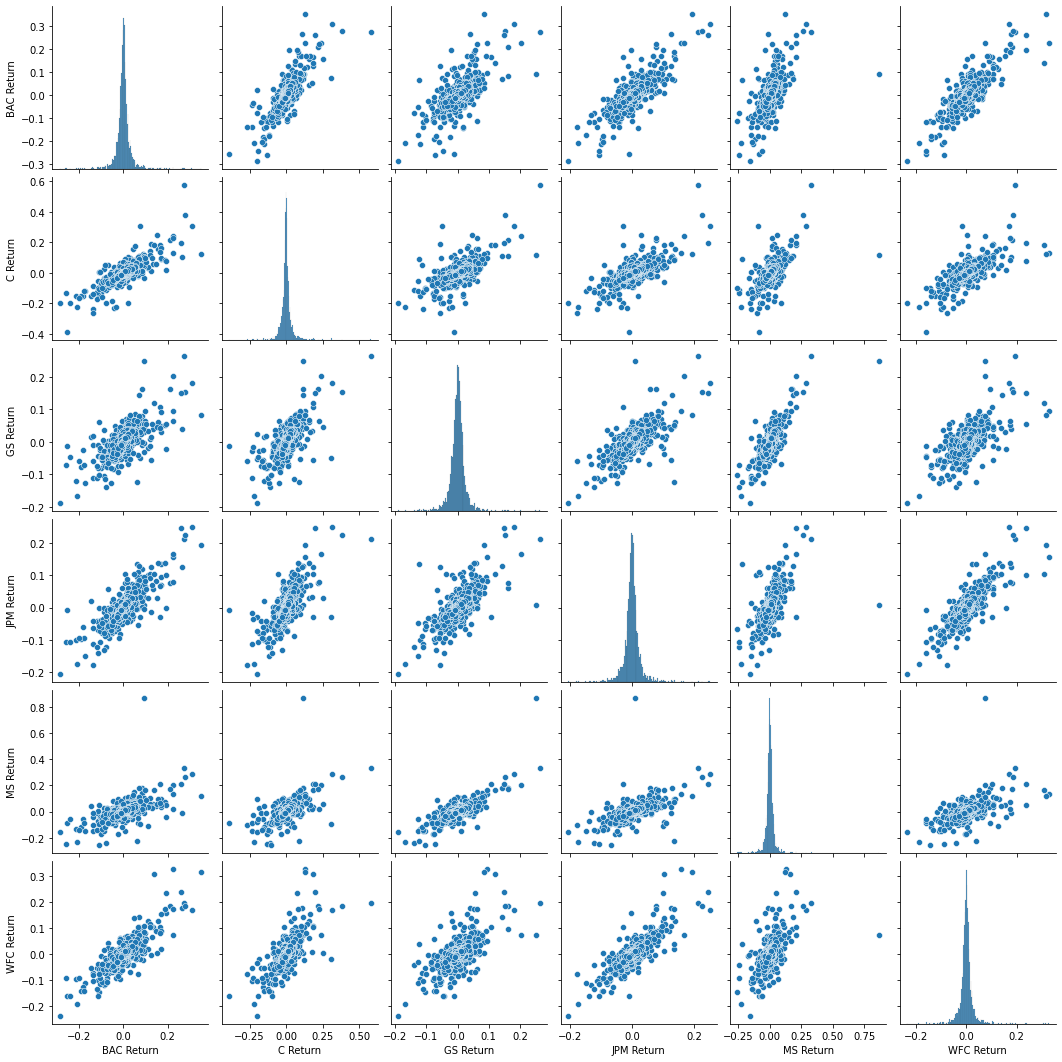

In [20]:
# Plot everything which is not NaN
import seaborn as sns
sns.pairplot(returns[1:].dropna())

In [21]:
# Worst historical returns
returns.min()

BAC Return   -0.289694
C Return     -0.390244
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WFC Return   -0.238223
dtype: float64

In [22]:
# Dates of worst historical returns
# Google what happened on that day...
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [25]:
# Highest returns
returns.max()

BAC Return    0.352691
C Return      0.578249
GS Return     0.264678
JPM Return    0.250967
MS Return     0.869835
WFC Return    0.327645
dtype: float64

In [27]:
# Dates of highest returns
# Google what happened on that day...
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [28]:
# Risk: it can be computed with the std. deviation
# High std. dev., more up/down, riskier
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [29]:
# Slicing of column values
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

<AxesSubplot:xlabel='MS Return', ylabel='Count'>

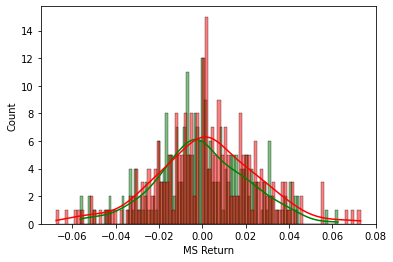

In [30]:
# Histrogram of returns in a time period
sns.histplot(returns.loc['2010-01-01':'2010-12-31']['MS Return'],
             color='green',
             bins=100,
             kde=True)
sns.histplot(returns.loc['2010-01-01':'2010-12-31']['C Return'],
             color='red',
             bins=100,
             kde=True)

### Time Series

In [31]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import cufflinks as cf

In [32]:
# Import plotly-offline modules
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# Connect Javascript to our notebook - this is for notebook development
init_notebook_mode(connected=True)
# In order to work offline through cufflinks, we need to run this:
cf.go_offline()

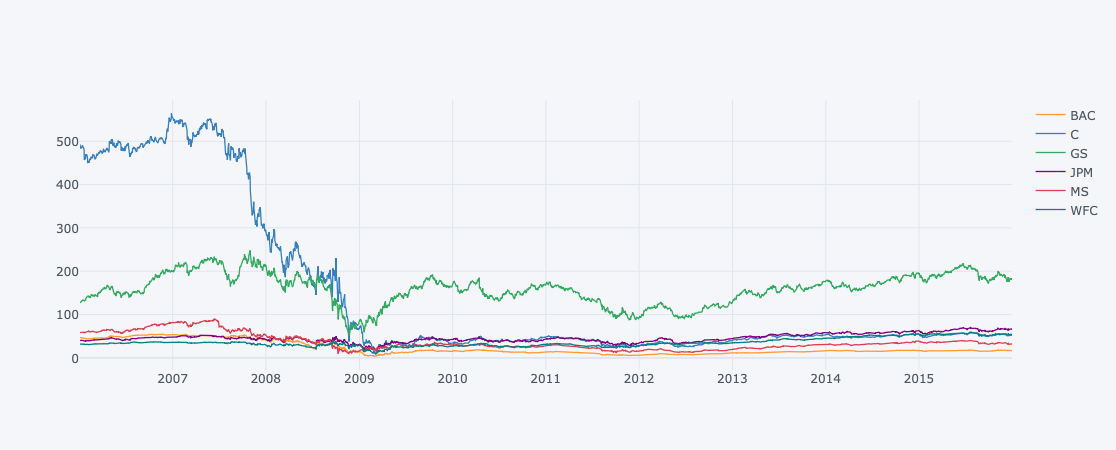

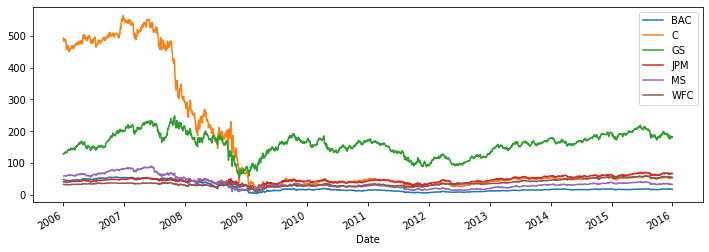

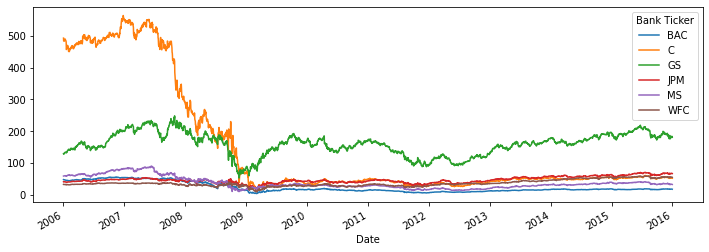

In [33]:
# Time Series for Close prices: all banks/tickers
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()
# Time Series for Close prices: all banks/tickers
# Here, we do it with cross-section: xs()
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))
# Same thing with iplot/plotly
# We can zoom, hoover on curves and see values...
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

### Moving Averages and Correlation Heatmaps

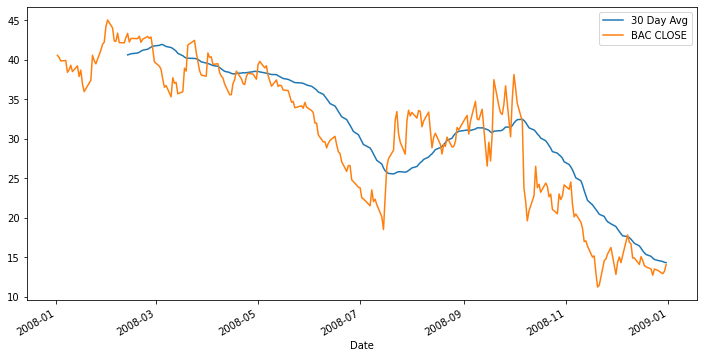

In [34]:
# Moving averages acen be computed with .rolling(window=w).mean()
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

In [35]:
# Heatmap of the correlations between Close prices of different banks
corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
corr

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

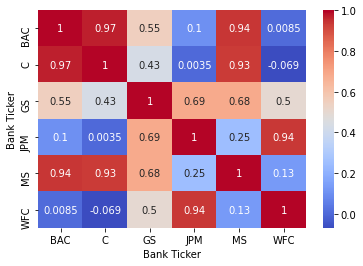

In [36]:
# Seaborn Heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)

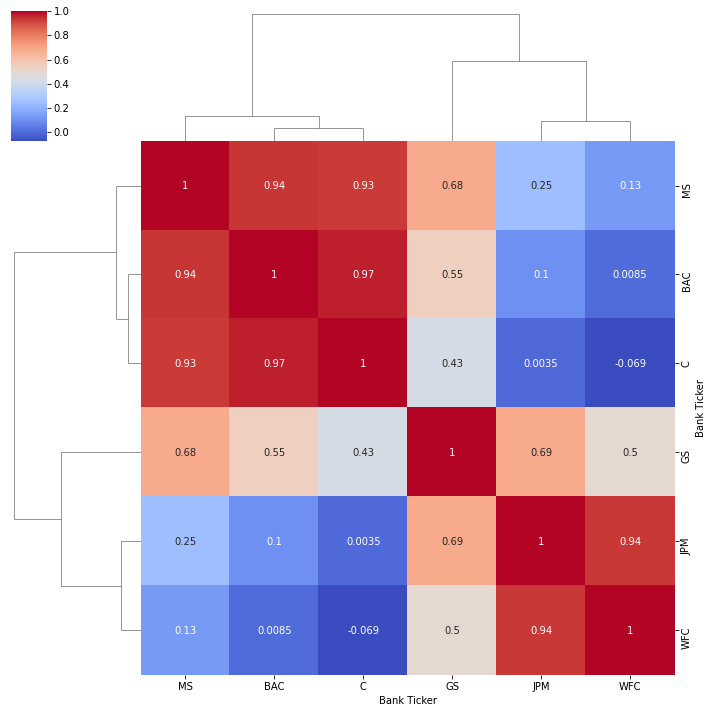

In [37]:
# Seaborn Clustermap
sns.clustermap(corr, cmap='coolwarm', annot=True)

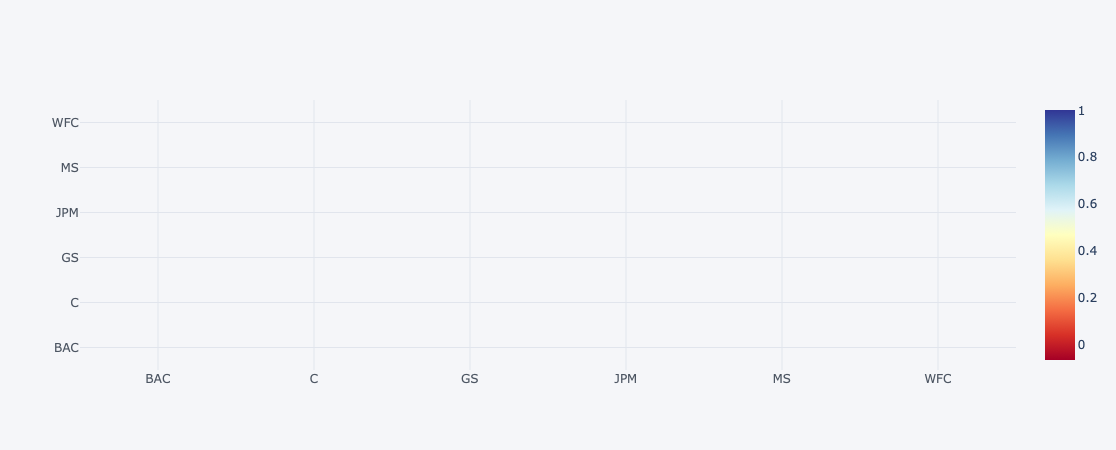

In [38]:
# Plotly Heatmap
corr.iplot(kind='heatmap', colorscale='rdylbu') # Red-Yellow-Blue

### Technical Analysis Charts: Moving Averages (Plotly)

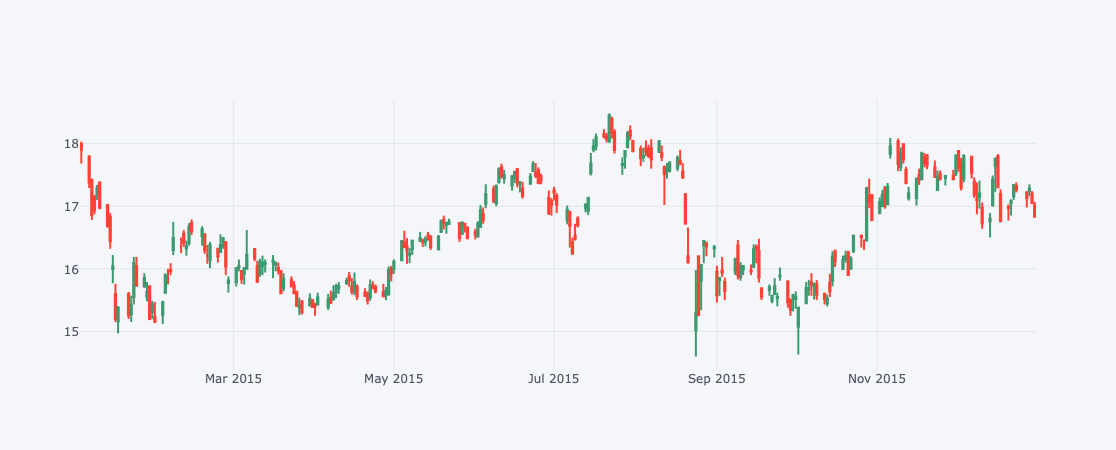

In [39]:
# Candlestick plots: 'Open', 'High', 'Low', 'Close': We pass columns in this order
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

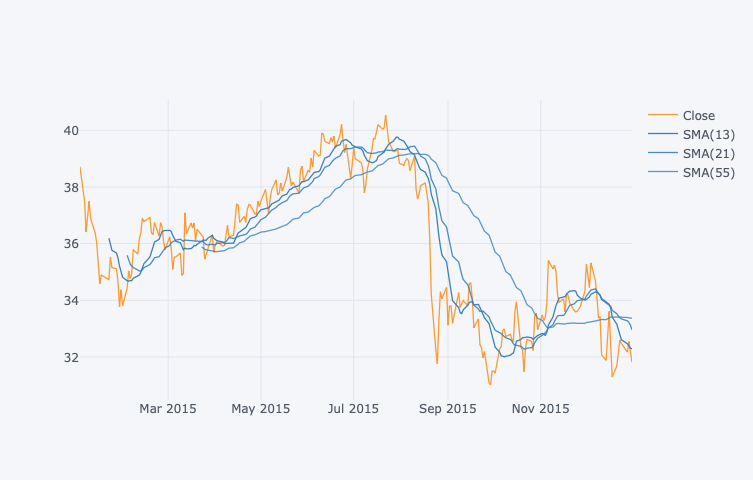

In [41]:
# Simple Moving Averages: These can be computed automatically with Plotly
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',
                                                   periods=[13,21,55],
                                                   title='Simple Moving Averages')

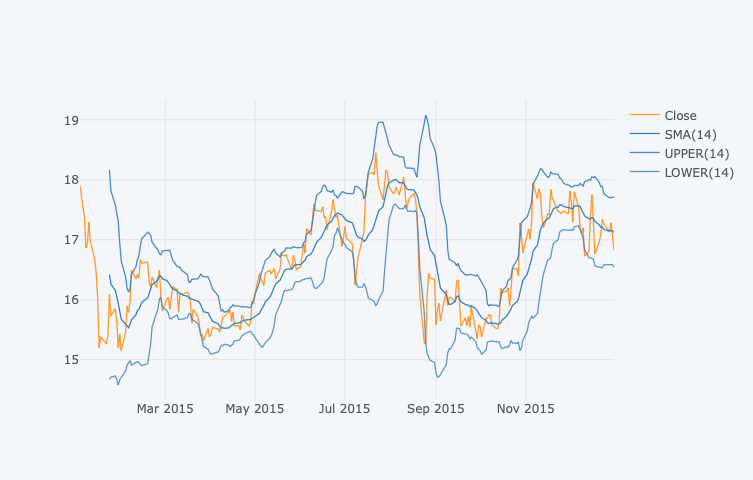

In [42]:
# Bollinger Band Plot
# Bollinger bands are +- X standard deviations of the chosen SMA
# X is a parameters, usually chosen between 1.5 and 2.5 (e.g., 2)
# When the bands tighten during a period of low volatility,
# it raises the likelihood of a sharp price move in either direction.
# When the bands separate by an unusual large amount,
# volatility increases and any existing trend may be ending
# Prices have a tendency to bounce within the bands' envelope
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

## Pandas Time Series Visualization

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
mcdon = pd.read_csv('data/mcdonalds.csv',index_col='Date',parse_dates=True)

In [7]:
mcdon.head()

,Adj. Close,Adj. Volume
Date,,
1970-01-02,0.209761,2825604.0
1970-01-05,0.213316,2210449.5
1970-01-06,0.214501,1951168.5
1970-01-07,0.213316,2728768.5
1970-01-08,0.213316,2242404.0


In [8]:
# Get columns
mcdon.columns

Index(['Adj. Close', 'Adj. Volume'], dtype='object')

<AxesSubplot:xlabel='Date'>

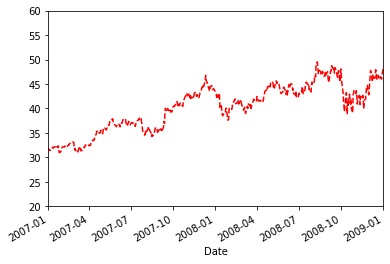

In [9]:
# Plot columns separately
# If we have date index/x, we can pass xlim=[,] & ylim=(,)
mcdon['Adj. Close'].plot(xlim=['2007-01-01','2009-01-01'],ylim=(20,60),ls='--',c='red')

<AxesSubplot:xlabel='Date'>

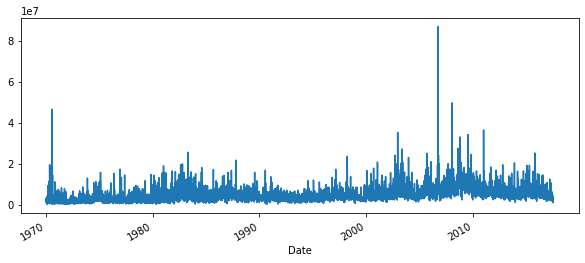

In [21]:
# Look for peaks
mcdon['Adj. Volume'].plot(figsize=(10,4))

### Formatting X axis ticks for dates

In [18]:
# Import dates module
import matplotlib.dates as dates
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
mcdon = pd.read_csv('data/mcdonalds.csv',index_col='Date',parse_dates=True)

In [20]:
idx = mcdon.loc['2007-01-01':'2007-05-01'].index

In [21]:
stock = mcdon.loc['2007-01-01':'2007-05-01']['Adj. Close']

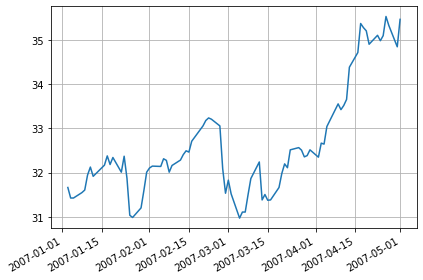

In [22]:
# OPTION 1: autofmt_xdate
fig,ax = plt.subplots()
# we use plot_date: we specify matplotlib we're dealing with dates
ax.plot_date(idx,stock,'-')
# grid-lines
ax.yaxis.grid(True)
ax.xaxis.grid(True)
# autoformat x axis for date data
fig.autofmt_xdate()
# tight layout does not always work
plt.tight_layout()

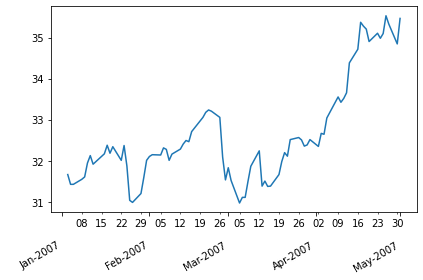

In [23]:
# OPTION 2: set_major/minor_locator
fig,ax = plt.subplots()
# we use plot_date: we specify matplotlib we're dealing with dates
ax.plot_date(idx,stock,'-')
# LOCATING: major and minor xtick values for dates
ax.xaxis.set_major_locator(dates.MonthLocator())
# look docu on strings; \n pushes ticks down
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%b-%Y'))
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0)) # mondays
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d')) # day number
# autoformat x axis for date data
fig.autofmt_xdate()
# tight layout does not always work
plt.tight_layout()